### Imports and helper functions

In [1]:
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from itertools import cycle

In [28]:
def visualize_points(pts):
    plt.plot(pts[:, 0], pts[:, 1], '.', alpha=0.5)
    plt.axis('equal')
    plt.grid()

    return plt

In [30]:
def create_ellipse_points(mean, cov, n_std=1.96, n_points=100):
    eigenvalues, eigenvectors = np.linalg.eig(cov)
    angle = np.arctan2(eigenvectors[1, 0], eigenvectors[0, 0])
    
    t = np.linspace(0, 2*np.pi, n_points)
    ellipse_x = n_std * np.sqrt(eigenvalues[0]) * np.cos(t)
    ellipse_y = n_std * np.sqrt(eigenvalues[1]) * np.sin(t)
    
    R = np.array([[np.cos(angle), -np.sin(angle)],
                  [np.sin(angle), np.cos(angle)]])
    
    ellipse_points = np.dot(np.column_stack([ellipse_x, ellipse_y]), R.T) + mean
    return ellipse_points[:, 0], ellipse_points[:, 1]

def plot_confidence_ellipses(distributions, n_std=1.96):
    fig, ax = plt.subplots()

    cmap = plt.get_cmap('viridis')
    colors = cycle(cmap(np.linspace(0, 1, len(distributions))))
    patches = []

    for idx, dist in enumerate(distributions):
        mean, cov = dist[0], np.array([dist[1], dist[2]])
        x, y = create_ellipse_points(mean, cov, n_std)
        
        # Get the next color from the colormap
        color = next(colors)
        
        # Create polygon
        polygon_points = np.column_stack([x, y])
        poly = Polygon(polygon_points, closed=True, fill=True, color=color, alpha=0.5)
        ax.add_patch(poly)
        patches.append(poly)

    ax.set_title('Confidence Ellipses')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(patches, ['Distribution {}'.format(i) for i in range(len(distributions))])
    ax.axis('equal')

    return plt

### Code

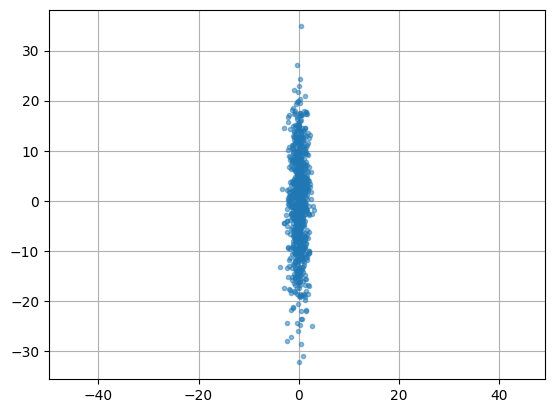

In [29]:
mean = [0, 0]
cov = [[1, 0], [0, 100]]
pts = np.random.multivariate_normal(mean, cov, size=800)

visualize_points(pts).show()

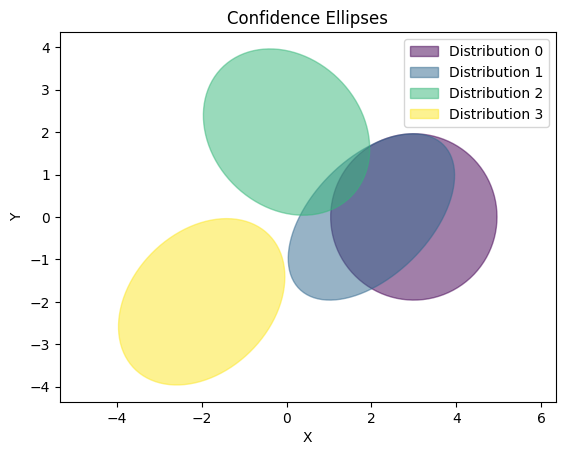

In [34]:
distributions = np.array([
    [[3, 0], [1, 0], [0, 1]],
    [[2, 0], [1, 0.5], [0.5, 1]],
    [[0, 2], [1, -0.2], [-0.2, 1]],
    [[-2, -2], [1, 0.3], [0.3, 1]]
])

plot_confidence_ellipses(distributions).show()

### Points to Distribution

### Assign points to distributions

Give a set of $N$ multivariate normal distributions and a set of $M$ points ${(x_i,y_i)}_{M}$. The problem we want to solve can be formulated as:
- find a subset of points 

In [7]:
distributions = np.array([
    [[0, 0], [1, 0], [0, 100]],
    [[2, 0], [1, 1], [0, 40]],
    [[0, 2], [1, 0], [10, 100]],
    [[0, 0], [1, 0], [0, 100]],
])

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from scipy.stats import multivariate_normal

def plot_distributions_with_percentile(distributions):
    plt.figure(figsize=(10, 10))

    for i, dist in enumerate(distributions):
        mu = dist[0]
        sigma = dist[1:]
        cov = np.array(sigma)

        x, y = np.mgrid[-10:10:.01, -10:10:.01]
        pos = np.empty(x.shape + (2,))
        pos[:, :, 0] = x
        pos[:, :, 1] = y

        rv = multivariate_normal(mu, cov)
        z = rv.pdf(pos)

        plt.contour(x, y, z, levels=[rv.ppf(0.95)], colors=['C{}'.format(i)])
        contour = plt.contour(x, y, z, levels=[rv.ppf(0.95)], colors=['C{}'.format(i)])
        p = contour.collections[0].get_paths()[0]
        v = p.vertices
        poly = Polygon(v, closed=True, edgecolor='k', alpha=0.3, facecolor=['C{}'.format(i)])
        plt.gca().add_patch(poly)

    plt.title('Distributions with 95th Percentile Polygons')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.grid(True)
    plt.show()

distributions = np.array([
    [[0, 0], [1, 0], [0, 100]],
    [[2, 0], [1, 1], [0, 40]],
    [[0, 2], [1, 0], [10, 100]],
    [[0, 0], [1, 0], [0, 100]],
])

plot_distributions_with_percentile(distributions)

AttributeError: 'multivariate_normal_frozen' object has no attribute 'ppf'

<Figure size 1000x1000 with 0 Axes>

### Gaussian Processes